# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [1]:
# 1. Import pandas as pd and numpy as np
import pandas as pd

In [2]:
# 2. Print the version of pandas that has been imported.
print(pd.__version__)

2.2.3


In [3]:
# 3. Create a pandas Series from the following list:
data = [10, 20, 30, 40, 50]
# Your code here
pd_series = pd.Series(data)
pd_series

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [4]:
# 4. Create a DataFrame from the following dictionary:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
# Your code here
pd_DataFrame = pd.DataFrame(data_dict)
pd_DataFrame

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [5]:
# 5. Set the 'name' column as the index of the DataFrame created in Q4.
pd_DataFrame = pd_DataFrame.set_index('name')
pd_DataFrame

,age,city
name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [6]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Your code here
chipo = pd.read_csv(url, sep='\t')  #sep Parameter is used for specifing the seperator character, whic is by default a ','



In [7]:
# 7. Show the first 10 entries of the dataframe.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [8]:
# 8. What is the number of observations (rows) and columns in the dataset?
print("Row count:- ",chipo.shape[0])
print("Column count:- ",chipo.shape[1])

Row count:-  4622
Column count:-  5


In [9]:
# 9. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [10]:
# 10. How is the dataset indexed?
chipo.index


RangeIndex(start=0, stop=4622, step=1)

---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [11]:
# 11. Check the data type of each column.
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [12]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price'] = chipo['item_price'].str.replace('$','',regex=False).astype(float)
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [13]:
# 13. Are there any missing values in the dataset? Check for nulls.
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [14]:
# 14. Drop any duplicate rows, if they exist.
chipo.drop_duplicates(inplace=True)

In [15]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

---
## Section 4: Filtering & Sorting


In [16]:
# 16. Sort the dataframe by 'item_price' in descending order.
chipo.sort_values('item_price', ascending=False, inplace=True)
chipo = chipo.reset_index(drop=True)


In [17]:
# 17. How many items cost more than $10.00?
chipo[chipo['item_price'] > 10.00].shape[0]

1123

In [18]:
# 18. What is the price of each item? 
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
dict ={
    'name': chipo['item_name'],
    'price': chipo['item_price']
}
price_of_item = pd.DataFrame(dict)


In [19]:
price_of_item.drop_duplicates(inplace=True)
price_of_item = price_of_item.reset_index(drop=True)


In [20]:
# 19. Select only the items where the name is 'Chicken Bowl'.
chipo.query(" item_name == 'Chicken Bowl'")

,order_id,quantity,item_name,choice_description,item_price,revenue
5,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
9,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25,78.75
24,1764,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",22.50,45.00
30,997,2,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",22.50,45.00
32,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00
...,...,...,...,...,...,...
2842,274,1,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.49,8.49
2846,1637,1,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.49,8.49
2848,1160,1,Chicken Bowl,"[Fresh Tomato (Mild), [Rice, Sour Cream, Cheese]]",8.19,8.19
2853,1466,1,Chicken Bowl,"[Fresh Tomato (Mild), [Lettuce, Fajita Veggies...",8.19,8.19


In [21]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
chipo.query("item_name == 'Chicken Bowl' and quantity > 1")     #query() function allows us to write selection condition in the form of a query


,order_id,quantity,item_name,choice_description,item_price,revenue
5,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
9,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25,78.75
24,1764,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",22.50,45.00
30,997,2,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",22.50,45.00
32,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00
37,1410,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans...",21.96,43.92
38,1004,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajit...",21.96,43.92
40,837,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans...",21.96,43.92
43,1170,2,Chicken Bowl,"[Tomatillo-Green Chili Salsa (Medium), [Black ...",21.96,43.92
44,1540,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Pinto...",21.96,43.92


---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [22]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# Your code here
drinks = pd.read_csv(url_drinks)
drinks


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [23]:
# 22. Which continent drinks more beer on average?
drinks['beer_servings'].groupby(drinks['continent']).mean().sort_values(ascending = False).head(1)


continent
EU    193.777778
Name: beer_servings, dtype: float64

In [24]:
# 23. For each continent, print the statistics for wine consumption.
#drinks['wine_servings'].groupby(drinks['continent']).describe()
drinks['wine_servings'].groupby(drinks['continent']).agg(['mean', 'max', 'median', 'count', 'sum'])

,mean,max,median,count,sum
continent,,,,,
AF,16.264151,233,2.0,53,862
AS,9.068182,123,1.0,44,399
EU,142.222222,370,128.0,45,6400
OC,35.625000,212,8.5,16,570
SA,62.416667,221,12.0,12,749


In [25]:
# 24. Print the mean alcohol consumption per continent for every column.
drinks[['wine_servings', 'beer_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']].groupby(drinks['continent']).mean()

,wine_servings,beer_servings,spirit_servings,total_litres_of_pure_alcohol
continent,,,,
AF,16.264151,61.471698,16.339623,3.007547
AS,9.068182,37.045455,60.840909,2.170455
EU,142.222222,193.777778,132.555556,8.617778
OC,35.625000,89.687500,58.437500,3.381250
SA,62.416667,175.083333,114.750000,6.308333


In [26]:
# 25. Print the median alcohol consumption per continent for every column.
drinks[['wine_servings', 'beer_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']].groupby(drinks['continent']).median()

,wine_servings,beer_servings,spirit_servings,total_litres_of_pure_alcohol
continent,,,,
AF,2.0,32.0,3.0,2.30
AS,1.0,17.5,16.0,1.20
EU,128.0,219.0,122.0,10.00
OC,8.5,52.5,37.0,1.75
SA,12.0,162.5,108.5,6.85


---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [27]:
chipo = chipo.reset_index(drop= True)

In [28]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.
def price(prc):
    if prc<=10:
        return 'Low'
    else:
        return 'High'
chipo['price_level'] = chipo['item_price'].dropna().apply(price)
chipo['price_level']



0       High
1       High
2       High
3       High
4       High
        ... 
4558     Low
4559     Low
4560     Low
4561     Low
4562     Low
Name: price_level, Length: 4563, dtype: object

In [29]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
chipo['item_name'].apply(str.upper)

0       CHIPS AND FRESH TOMATO SALSA
1                      CARNITAS BOWL
2                    CHICKEN BURRITO
3                    CHICKEN BURRITO
4                     VEGGIE BURRITO
                    ...             
4558                     CANNED SODA
4559                     CANNED SODA
4560                   BOTTLED WATER
4561                   BOTTLED WATER
4562                   BOTTLED WATER
Name: item_name, Length: 4563, dtype: object

In [30]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
chipo = chipo.reset_index(drop=True)
#chipo.iloc[10:21,1:4]  #iloc excludes the end index;
chipo.loc[10:20,chipo.columns[1:4]]     #loc doesnt excludes the end index for the row part but it can take column only via column method which excludes the end part

,quantity,item_name,choice_description
10,3,Chicken Burrito,"[Fresh Tomato Salsa, Rice]"
11,3,Steak Bowl,"[Tomatillo Green Chili (Medium), [Rice, Black ..."
12,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."
13,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee..."
14,2,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees..."
15,2,Steak Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."
16,2,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Sour ..."
17,2,Steak Burrito,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl..."
18,2,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,..."
19,2,Steak Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Sour ..."


---
## Section 7: Merging & Joining


In [31]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
merged_df = pd.merge(df1, df2, on='ID', how='inner')
merged_df


,ID,Name,Score
0,2,Bob,85
1,3,Charlie,90


In [32]:
# 30. Merge them on 'ID' using an outer join.
merged_df_1 = pd.merge(df1, df2, on='ID', how='outer')
merged_df_1

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0
3,4,NaN,95.0


In [33]:
# 31. Merge them on 'ID' using a left join (keep all from df1).
merged_df_2 = pd.merge(df1, df2, on='ID', how='left')
merged_df_2


,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [34]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.
date_range = pd.date_range(start='2023-01-01', end='2023-01-10')
date_range

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.
import random
random.seed(42)  # used for same random number generation again and again

sales = pd.DataFrame({
    'sales': [random.randint(0,100) for _ in range(len(date_range))]   # this statement causes a an error and random.randint(), repeats the same number if ecexuted once and it does not happen in np.random.randint(10,100,size(len(date_range))), here size is no. of numbers to be generated 
},index=date_range)
sales

,sales
2023-01-01,81
2023-01-02,14
2023-01-03,3
2023-01-04,94
2023-01-05,35
2023-01-06,31
2023-01-07,28
2023-01-08,17
2023-01-09,94
2023-01-10,13


In [36]:
# 34. Resample the data to calculate the 3-day sum of sales
sales.resample('3D').sum()


,sales
2023-01-01,98
2023-01-04,160
2023-01-07,139
2023-01-10,13


In [37]:
# 35. Shift the 'Sales' column by 1 day (create a lag column).
sales['sales_lag'] = sales['sales'].shift(1)            # The shift method is used for shifting the value in a column up or down by specific number of rows.
sales['sales_lag']

2023-01-01     NaN
2023-01-02    81.0
2023-01-03    14.0
2023-01-04     3.0
2023-01-05    94.0
2023-01-06    35.0
2023-01-07    31.0
2023-01-08    28.0
2023-01-09    17.0
2023-01-10    94.0
Freq: D, Name: sales_lag, dtype: float64

---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [38]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Your code here
titanic = pd.read_csv(url_titanic)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
# 37. How many passengers survived? (Survived=1)
#titanic['Survived'].sum()       #as survived == 1
#titanic['Survived'].value_counts()[1]  #two categories 1 and 0
print("The no. of Passangers Survived:- ",titanic[titanic['Survived'] == 1]['Survived'].count())

The no. of Passangers Survived:-  342


In [40]:
# 38. What is the average age of passengers?
print("Average Age of Passangers is:- ",titanic['Age'].mean().round(2), "Yrs")


Average Age of Passangers is:-  29.7 Yrs


In [41]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
titanic['Survived'].groupby(titanic['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [42]:
# 40. Fill missing values in the 'Age' column with the median age.
titanic['Age'].isnull().sum()
med_age = titanic['Age'].median()
titanic['Age'] = titanic['Age'].fillna(med_age)

In [43]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
#titanic.groupby(['Sex', 'Pclass'])['Age'].mean().unstack().round(2)  # unctack() function converts the pclass in rows into columns making it look well-structured
pd.pivot_table(titanic, values='Age', index='Sex', columns='Pclass', aggfunc='mean')  # This is a pivot table;



Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


In [44]:
import matplotlib.pyplot as plt

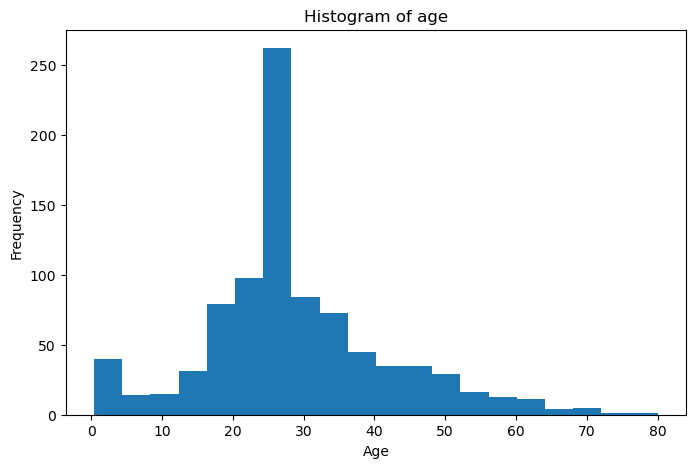

In [45]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
#titanic['Age'].isnull().sum()
age = titanic['Age']
plt.figure(figsize=(8,5))
plt.hist(age,bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


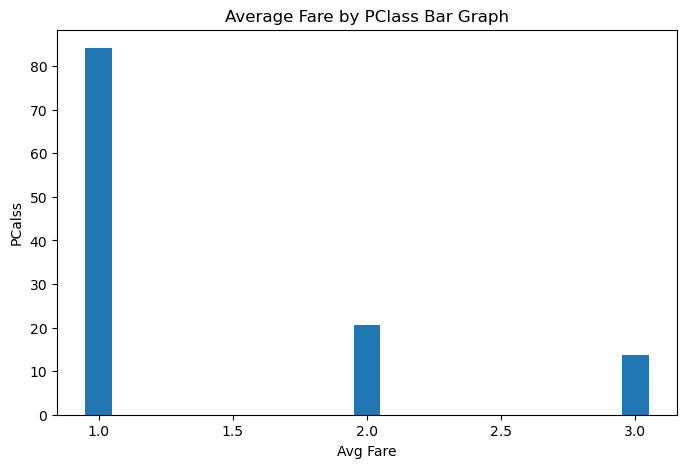

In [46]:
# 43. Plot a bar chart of the average fare by Pclass.
avg = titanic['Fare'].groupby(titanic['Pclass']).mean()
plt.figure(figsize=(8,5))
plt.bar(avg.index,avg.values,0.1)
plt.xlabel('Avg Fare')
plt.ylabel('PCalss')
plt.title('Average Fare by PClass Bar Graph')
print(avg)
plt.show()

---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
